#### Aplicação do modelo com o MobileNet como extrator no Cancer Bucal ###
João Carvalho,
Daniel Costa,
Gabriel Conte

In [1]:
# importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import xgboost as xgb
import lightgbm as lgbm
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
# abrir dataset

dataset = pd.read_csv('D:\\archive\\features_oral_cancer_MobileNet.csv')

In [3]:
# separar as colunas de dados e label

colunas_dados = []
for column in dataset.columns:
    if column != 'label':
        colunas_dados.append(column)
    else: 
        print("Achou")

X_full = dataset[colunas_dados]
Y_full = dataset['label']
X_full = np.array(X_full)
Y_full = np.array(Y_full)
np.random.shuffle(X_full)
np.random.shuffle(Y_full)

del dataset




Achou


In [4]:
# Separa em conjunto de teste e treino
x_train, x_test, y_train, y_test = train_test_split(X_full,Y_full,random_state=42,test_size=0.3)

del X_full, Y_full


Accuracy:  0.4861712762412529


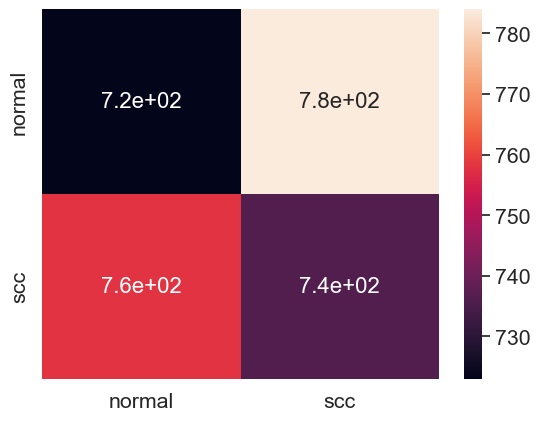

In [5]:
# aplicar LSVC
modelSVM = svm.LinearSVC()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['normal','scc'], yticklabels=['normal','scc']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.4931689436854382


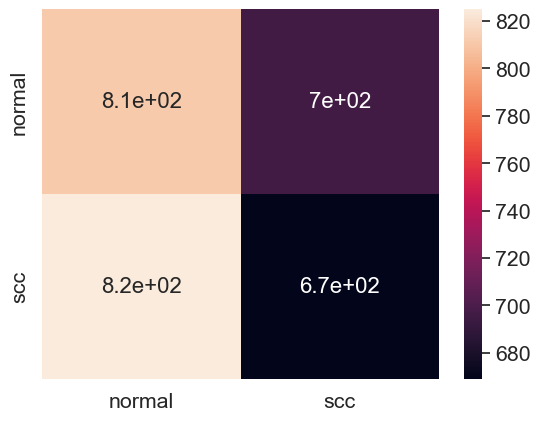

In [6]:
# aplicar RF
modelSVM = RandomForestClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['normal','scc'], yticklabels=['normal','scc']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

[LightGBM] [Info] Number of positive: 3507, number of negative: 3494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.480479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6080966
[LightGBM] [Info] Number of data points in the train set: 7001, number of used features: 38620
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500928 -> initscore=0.003714
[LightGBM] [Info] Start training from score 0.003714
Accuracy:  0.498167277574142


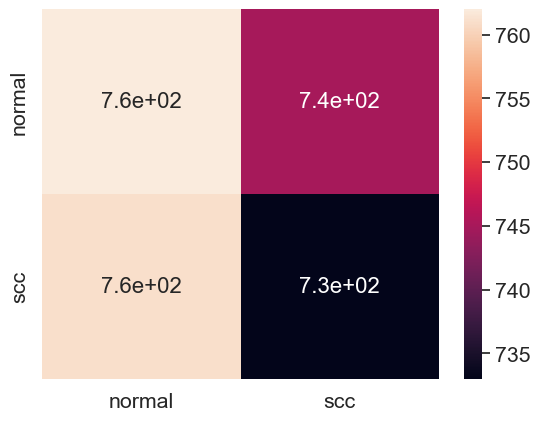

In [7]:
# aplicar LGBM
modelSVM = lgbm.LGBMClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['normal','scc'], yticklabels=['normal','scc']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)